# This Section is strictly Loans which is seperate from the Click Through Rate project.

# *Section 1*: Loan Data Exploration Across Provinces.

**Objective**: Creating visually appealing graphs giving insights on the data set.

## Data Exploration For Loans


### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
import seaborn as sns
import sklearn

import numpy as np

import imblearn

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer



### Data Upload

In [ ]:
# Loan Data 2014/06/30
df1 = pd.read_csv('/Users/emmanuelnnadi/Desktop/test2&3_data/test2_data/Test_Data_C_2014_06_30.csv')

# Loan Data 2014/07/30
df2 = pd.read_csv('/Users/emmanuelnnadi/Desktop/test2&3_data/test2_data/Test_Data_C_2014_07_30.csv')

# Loan Data 2014/08/30
df3 = pd.read_csv('/Users/emmanuelnnadi/Desktop/test2&3_data/test2_data/Test_Data_C_2014_08_30.csv')


In [ ]:
df1.shape

(13386, 8)

In [ ]:
df1.head()

,Unnamed: 0,ID,Dlq_stat,amounts,obs_date,Dlq_days,Vertical1,Province1
0,1,F1,Current,389.628333,2014-06-30 12:00:00,NaN,Home Improvement,ON
1,2,F2,Current,2446.128333,2014-06-30 12:00:00,NaN,Vehicle,AB
2,3,F3,Current,2874.366667,2014-06-30 12:00:00,NaN,Home Improvement,ON
3,4,F4,Current,299.626667,2014-06-30 12:00:00,NaN,Home Improvement,ON
4,5,F5,Current,745.455000,2014-06-30 12:00:00,NaN,Home Improvement,Other Provinces


In [ ]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Dlq_stat', 'amounts', 'obs_date', 'Dlq_days',
       'Vertical1', 'Province1'],
      dtype='object')

In [ ]:
# I RENAMED THE COLUMNS FOR EASIER IDENTIFICATION

new_col_names = {'Unnamed: 0': 'Index_num', 'Vertical1': 'Reason_for_loan', 'Province1': 'Province'}

df1.rename(columns=new_col_names, inplace=True)

In [ ]:
df1.drop(['Index_num', 'ID'], axis=1, inplace=True)

I decided to drop the columns i felt were unnecessary

In [ ]:
df1.head()

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
0,Current,389.628333,2014-06-30 12:00:00,NaN,Home Improvement,ON
1,Current,2446.128333,2014-06-30 12:00:00,NaN,Vehicle,AB
2,Current,2874.366667,2014-06-30 12:00:00,NaN,Home Improvement,ON
3,Current,299.626667,2014-06-30 12:00:00,NaN,Home Improvement,ON
4,Current,745.455000,2014-06-30 12:00:00,NaN,Home Improvement,Other Provinces


In [ ]:
df1['Province'].value_counts()

ON                 4604
Other Provinces    3482
AB                 3112
BC                 2188
Name: Province, dtype: int64

In [ ]:
# Check for Null Values

df1.isna().sum()

Dlq_stat               0
amounts                0
obs_date               0
Dlq_days           13281
Reason_for_loan        0
Province               0
dtype: int64

In [ ]:
# Since Delinquency has to do with delayed payments, i wanted to check how many NaN were in fact current.
df1[df1['Dlq_days'].isna()]

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
0,Current,389.628333,2014-06-30 12:00:00,NaN,Home Improvement,ON
1,Current,2446.128333,2014-06-30 12:00:00,NaN,Vehicle,AB
2,Current,2874.366667,2014-06-30 12:00:00,NaN,Home Improvement,ON
3,Current,299.626667,2014-06-30 12:00:00,NaN,Home Improvement,ON
4,Current,745.455000,2014-06-30 12:00:00,NaN,Home Improvement,Other Provinces
...,...,...,...,...,...,...
13276,WriteOff,1119.666667,2014-06-30 12:00:00,NaN,Vehicle,AB
13369,WriteOff,2314.510000,2014-06-30 12:00:00,NaN,Vehicle,AB
13370,WriteOff,1119.666667,2014-06-30 12:00:00,NaN,Vehicle,AB
13371,WriteOff,174.728333,2014-06-30 12:00:00,NaN,Vehicle,AB


In [ ]:
# 13272 of these are in fact current, so it is safe to assume zero. The Write Off is a judgement call as
# it might just be missing data and it is only just 9.
df1[df1['Dlq_days'].isna()]['Dlq_stat'].value_counts()

Current     13272
WriteOff        9
Name: Dlq_stat, dtype: int64

In [ ]:
# Therefore apply the imputation of zero in the missing values.
df1['Dlq_days'].fillna(0, inplace=True)

In [ ]:
df1.head()

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
0,Current,389.628333,2014-06-30 12:00:00,0.0,Home Improvement,ON
1,Current,2446.128333,2014-06-30 12:00:00,0.0,Vehicle,AB
2,Current,2874.366667,2014-06-30 12:00:00,0.0,Home Improvement,ON
3,Current,299.626667,2014-06-30 12:00:00,0.0,Home Improvement,ON
4,Current,745.455000,2014-06-30 12:00:00,0.0,Home Improvement,Other Provinces


In [ ]:
df1['Dlq_days'].value_counts()

0.0     13287
3.0         9
1.0         7
15.0        6
5.0         6
4.0         5
16.0        3
8.0         3
7.0         3
41.0        3
23.0        2
10.0        2
64.0        2
68.0        2
58.0        2
11.0        2
77.0        2
55.0        2
43.0        2
70.0        2
46.0        2
18.0        2
6.0         2
39.0        2
50.0        2
62.0        2
78.0        2
25.0        2
75.0        2
14.0        2
31.0        1
79.0        1
2.0         1
9.0         1
59.0        1
34.0        1
52.0        1
13.0        1
30.0        1
29.0        1
74.0        1
36.0        1
71.0        1
48.0        1
Name: Dlq_days, dtype: int64

In [ ]:
# Convert obs_date to timestamp

df1['obs_date'] = pd.to_datetime(df1['obs_date'])

In [ ]:
# Check for Data Types

df1.dtypes

Dlq_stat                   object
amounts                   float64
obs_date           datetime64[ns]
Dlq_days                  float64
Reason_for_loan            object
Province                   object
dtype: object

In [ ]:
dlq = (df1['Dlq_stat'].value_counts()/len(df1))*100
dlq

Current       99.148364
Delinquent     0.784402
WriteOff       0.067234
Name: Dlq_stat, dtype: float64

In [ ]:
cat_types = dlq.index.tolist()
cat_types

['Current', 'Delinquent', 'WriteOff']

In [ ]:
perc_list = dlq.tolist()

perc_list

[99.14836396234872, 0.7844016136261767, 0.06723442402510085]

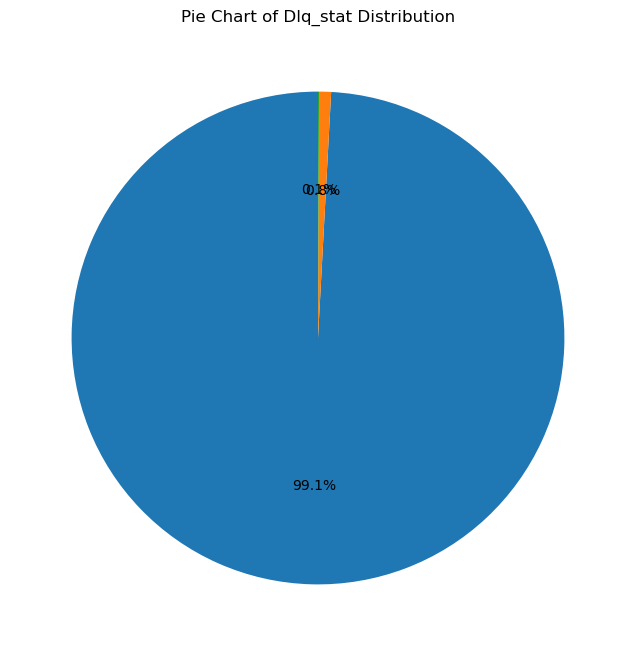

In [ ]:
import matplotlib.pyplot as plt

# Example data (proportions from dlq)
proportions = perc_list
categories = cat_types

plt.figure(figsize=(8, 8))
# Create the pie chart using direct values from the dlq Series
plt.pie(dlq, labels=None, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Pie Chart of Dlq_stat Distribution')

# Show the pie chart
plt.show()


This graph shows that a good majority of the data here is in the current status. Here is the breakdown by percentage.
- Current       99.148364%
- Delinquent     0.784402%
- WriteOff       0.067234%

In [ ]:
df_dlq = df1[df1['Dlq_days']!=0]

df_dlq

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
13277,Delinquent,4572.253333,2014-06-30 12:00:00,75.0,Vehicle,AB
13278,Delinquent,2902.875000,2014-06-30 12:00:00,2.0,Vehicle,Other Provinces
13279,Delinquent,418.950000,2014-06-30 12:00:00,34.0,Vehicle,ON
13280,Delinquent,7739.803333,2014-06-30 12:00:00,14.0,Vehicle,BC
13281,Delinquent,922.595000,2014-06-30 12:00:00,31.0,Vehicle,ON
...,...,...,...,...,...,...
13380,Delinquent,3665.591667,2014-06-30 12:00:00,68.0,Vehicle,AB
13381,Delinquent,3502.045000,2014-06-30 12:00:00,15.0,Vehicle,AB
13382,Delinquent,2780.255000,2014-06-30 12:00:00,41.0,Vehicle,AB
13384,Delinquent,1550.588333,2014-06-30 12:00:00,55.0,Home Improvement,AB


I did this to ensure to seperate the loan with delinquency so i can plot it later.

In [ ]:
province_loan_type = df1.groupby('Province')['Reason_for_loan'].value_counts().unstack()

province_loan_type

Reason_for_loan,Home Improvement,Vehicle
Province,,
AB,1083,2029
BC,614,1574
ON,3074,1530
Other Provinces,1516,1966


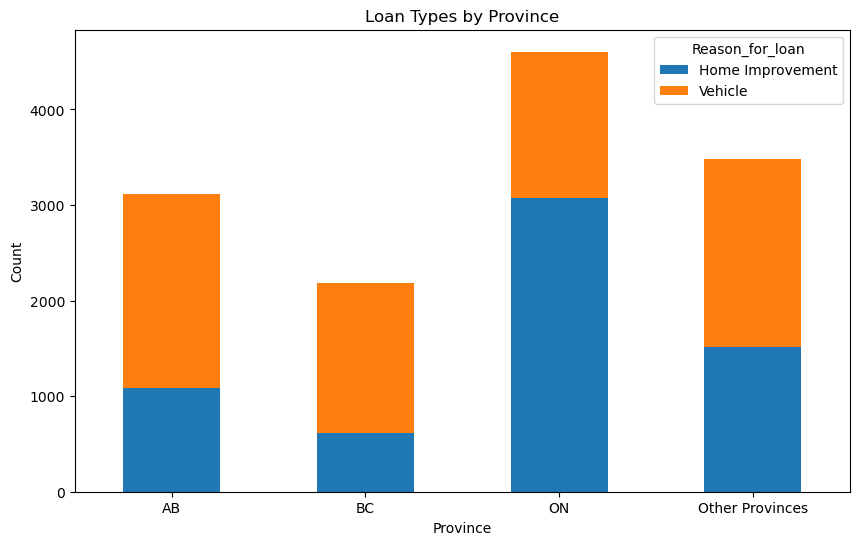

In [ ]:
# Plot for loan types by province

province_loan_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Types by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()



Here we see that ONTARIO has the most loans, the most Home Improvement loans as well.

BC takes the least loans and are more towards taking Vehicle loans

Other Provinces are seem to be a bit more balanced with Vehicle Loans being the priority.

For Alberta nearly a third of it is with Vehicle loans.

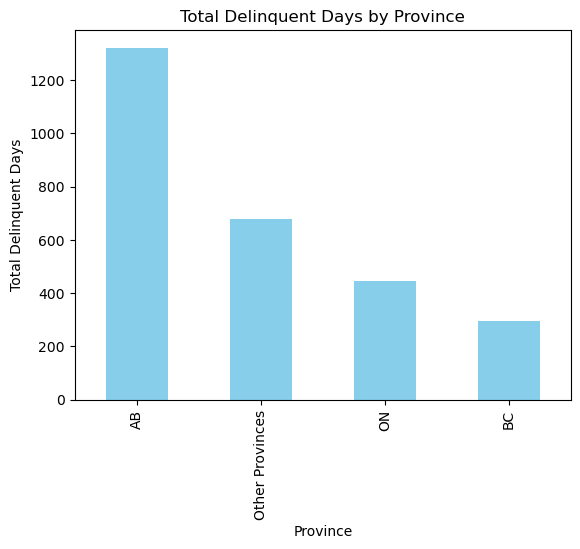

In [ ]:
# Creating a bar plot for total delinquent days by province
delinquent_days_by_province = df1.groupby('Province')['Dlq_days'].sum().sort_values(ascending=False)
delinquent_days_by_province.plot(kind='bar', color='skyblue')

plt.title('Total Delinquent Days by Province')
plt.xlabel('Province')
plt.ylabel('Total Delinquent Days')
plt.show()

This graph here shows that AB has the most days in total delinquent.

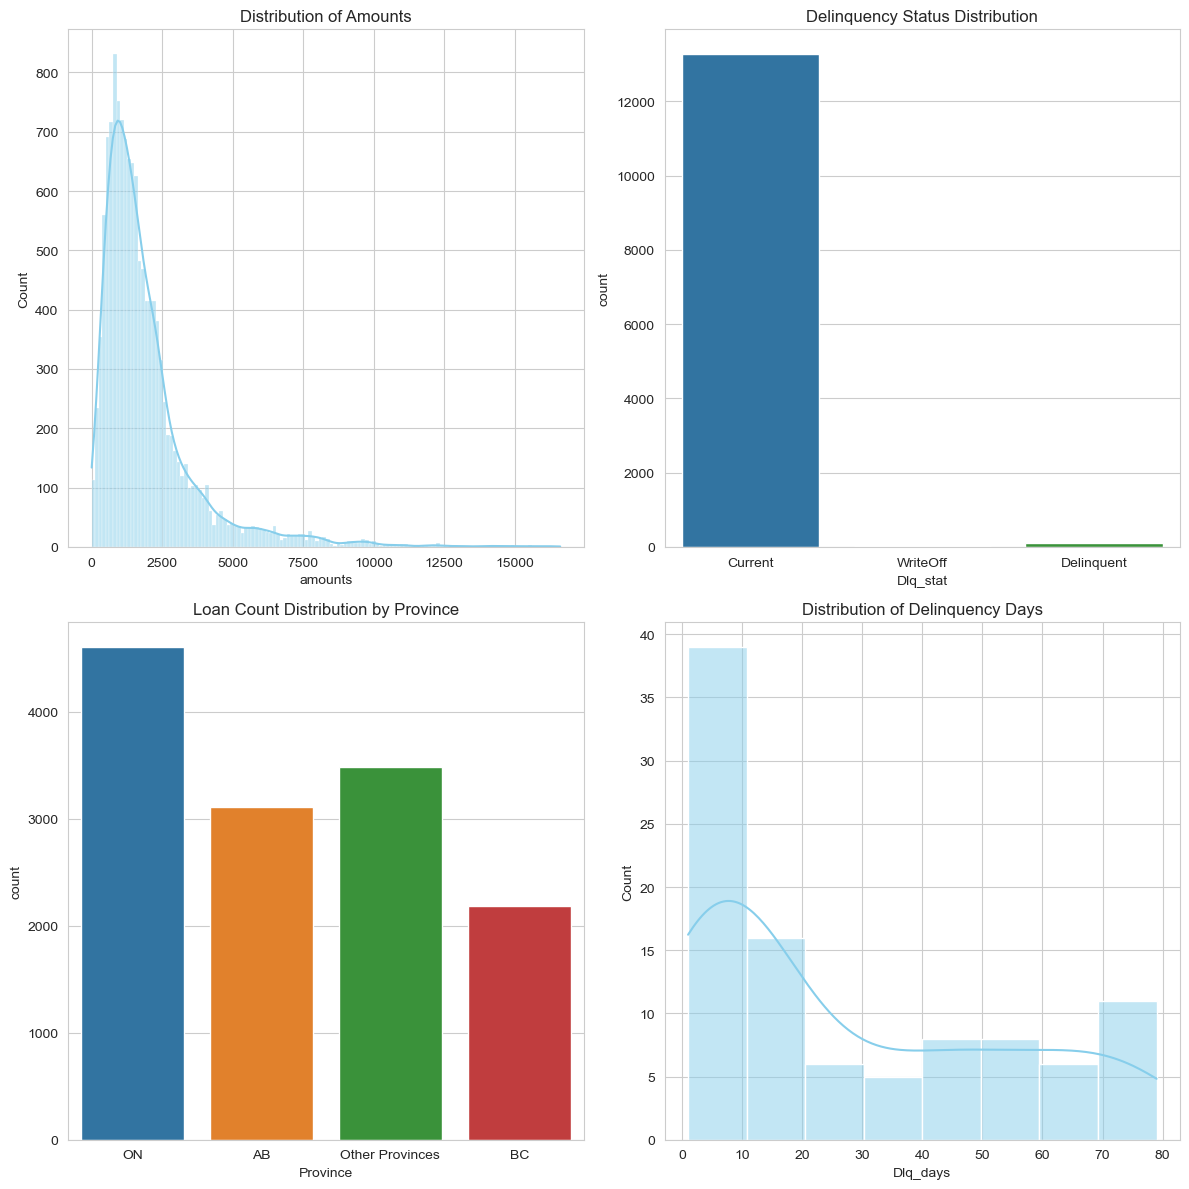

In [ ]:
# Set the style of seaborn plot
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot for amounts
sns.histplot(data=df1, x="amounts", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Amounts')

# Plot for Dlq_stat
sns.countplot(data=df1, x='Dlq_stat', ax=axs[0, 1])
axs[0, 1].set_title('Delinquency Status Distribution')

# Plot for Province1
sns.countplot(data=df1, x='Province', ax=axs[1, 0])
axs[1, 0].set_title('Loan Count Distribution by Province')

# Plot for Dlq_days
sns.histplot(data=df_dlq, x="Dlq_days", kde=True, color="skyblue", ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Delinquency Days')

plt.tight_layout()
plt.show()


The distribution of amounts here shows that majority of the loans are between 0-$5000 dollars

The delinquency days is in a respectable position, with majority of them being between 0-10 days.

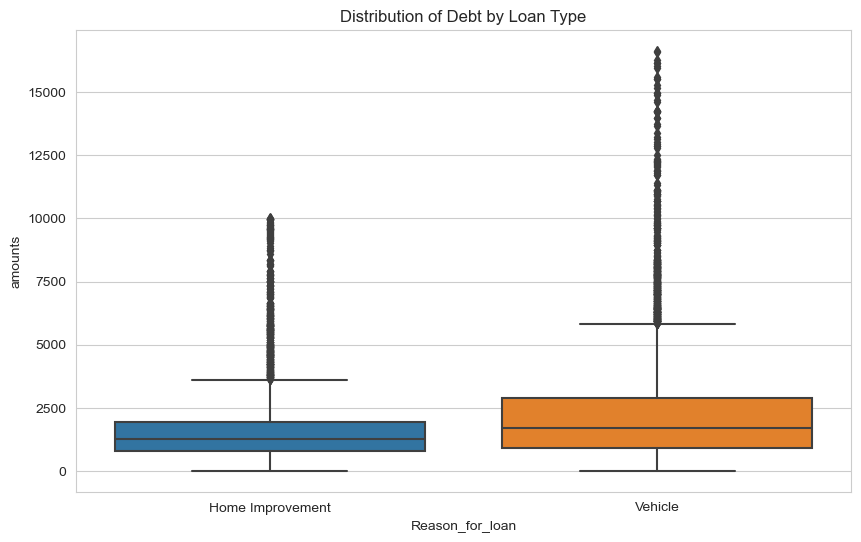

In [ ]:
# Plot for Vertical1
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Reason_for_loan', y='amounts')
plt.title('Distribution of Debt by Loan Type')
plt.show()


In [ ]:
df1.groupby('Province')['Dlq_days'].sum().sort_values(ascending=False)

Province
AB                 1322.0
Other Provinces     677.0
ON                  447.0
BC                  295.0
Name: Dlq_days, dtype: float64

### Package Install

In [ ]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install panel

Note: you may need to restart the kernel to use updated packages.


## Loan type by Province

In [ ]:
import panel as pn
pn.extension()

import hvplot.pandas

The below graph shows the different reasons for loans by different provinces.

In [ ]:

def plot_province(province):
    province_data = df1[df1['Province'] == province]
    return province_data['Reason_for_loan'].value_counts().hvplot.bar(rot=0)

province_selector = pn.widgets.Select(name='Select province', options=df1['Province'].unique().tolist())

dynamic_map = pn.bind(plot_province, province_selector)

dashboard = pn.Row(
    pn.Column("# Loan Types by Province", province_selector),
    dynamic_map
)

dashboard.servable()


Row
    [0] Column
        [0] Markdown(str)
        [1] Select(options=['ON', 'AB', 'Other Provin...], value='ON')
    [1] ParamFunction(function)

In [ ]:
df_june = df1.copy()

In [ ]:
df_june

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
0,Current,389.628333,2014-06-30 12:00:00,0.0,Home Improvement,ON
1,Current,2446.128333,2014-06-30 12:00:00,0.0,Vehicle,AB
2,Current,2874.366667,2014-06-30 12:00:00,0.0,Home Improvement,ON
3,Current,299.626667,2014-06-30 12:00:00,0.0,Home Improvement,ON
4,Current,745.455000,2014-06-30 12:00:00,0.0,Home Improvement,Other Provinces
...,...,...,...,...,...,...
13381,Delinquent,3502.045000,2014-06-30 12:00:00,15.0,Vehicle,AB
13382,Delinquent,2780.255000,2014-06-30 12:00:00,41.0,Vehicle,AB
13383,WriteOff,350.861667,2014-06-30 12:00:00,0.0,Vehicle,AB
13384,Delinquent,1550.588333,2014-06-30 12:00:00,55.0,Home Improvement,AB


In [ ]:
df_june.columns

Index(['Dlq_stat', 'amounts', 'obs_date', 'Dlq_days', 'Reason_for_loan',
       'Province'],
      dtype='object')

In [ ]:
# Since the data is now clean i downloaded everything to a csv file on my computer.
df_june.to_csv('/Users/emmanuelnnadi/Desktop/June_Data', index=False)

I decided to impute the dlq_Days for the other data sets as well as rename the columns as well.

In [ ]:
df2.rename(columns=new_col_names, inplace=True)
df3.rename(columns=new_col_names, inplace=True)

df2.drop(['Index_num', 'ID'], axis=1, inplace=True)
df3.drop(['Index_num', 'ID'], axis=1, inplace=True)

df2['Dlq_days'].fillna(0, inplace=True)
df3['Dlq_days'].fillna(0, inplace=True)



In [ ]:
df3.head()

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
0,Current,360.115000,2014-08-30 12:00:00,0.0,Home Improvement,ON
1,Current,2410.971667,2014-08-30 12:00:00,0.0,Vehicle,AB
2,Current,2825.750000,2014-08-30 12:00:00,0.0,Home Improvement,ON
3,Current,277.110000,2014-08-30 12:00:00,0.0,Home Improvement,ON
4,Current,691.580000,2014-08-30 12:00:00,0.0,Home Improvement,Other Provinces


In [ ]:
df2.head()

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province
0,Current,374.878333,2014-07-30 12:00:00,0.0,Home Improvement,ON
1,Current,2850.123333,2014-07-30 12:00:00,0.0,Home Improvement,ON
2,Current,288.401667,2014-07-30 12:00:00,0.0,Home Improvement,ON
3,Current,718.526667,2014-07-30 12:00:00,0.0,Home Improvement,Other Provinces
4,Current,274.466667,2014-07-30 12:00:00,0.0,Home Improvement,ON


In [ ]:
# Adding a 'month' column to each dataframe to help in the analysis and to also making the different datasets standout
df1['month'] = 'June'
df2['month'] = 'July'
df3['month'] = 'August'

In [ ]:
df1.head()

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province,month
0,Current,389.628333,2014-06-30 12:00:00,0.0,Home Improvement,ON,June
1,Current,2446.128333,2014-06-30 12:00:00,0.0,Vehicle,AB,June
2,Current,2874.366667,2014-06-30 12:00:00,0.0,Home Improvement,ON,June
3,Current,299.626667,2014-06-30 12:00:00,0.0,Home Improvement,ON,June
4,Current,745.455000,2014-06-30 12:00:00,0.0,Home Improvement,Other Provinces,June


Since they share the same shape i then did a concat on here so it can be combined to one big table.

In [ ]:
df = pd.concat([df1, df2, df3])

In [ ]:
df

,Dlq_stat,amounts,obs_date,Dlq_days,Reason_for_loan,Province,month
0,Current,389.628333,2014-06-30 12:00:00,0.0,Home Improvement,ON,June
1,Current,2446.128333,2014-06-30 12:00:00,0.0,Vehicle,AB,June
2,Current,2874.366667,2014-06-30 12:00:00,0.0,Home Improvement,ON,June
3,Current,299.626667,2014-06-30 12:00:00,0.0,Home Improvement,ON,June
4,Current,745.455000,2014-06-30 12:00:00,0.0,Home Improvement,Other Provinces,June
...,...,...,...,...,...,...,...
13824,Delinquent,3558.248333,2014-08-30 12:00:00,4.0,Vehicle,AB,August
13825,Delinquent,3317.956667,2014-08-30 12:00:00,7.0,Vehicle,AB,August
13826,Delinquent,1054.600000,2014-08-30 12:00:00,4.0,Vehicle,AB,August
13827,Delinquent,4545.338333,2014-08-30 12:00:00,4.0,Vehicle,AB,August


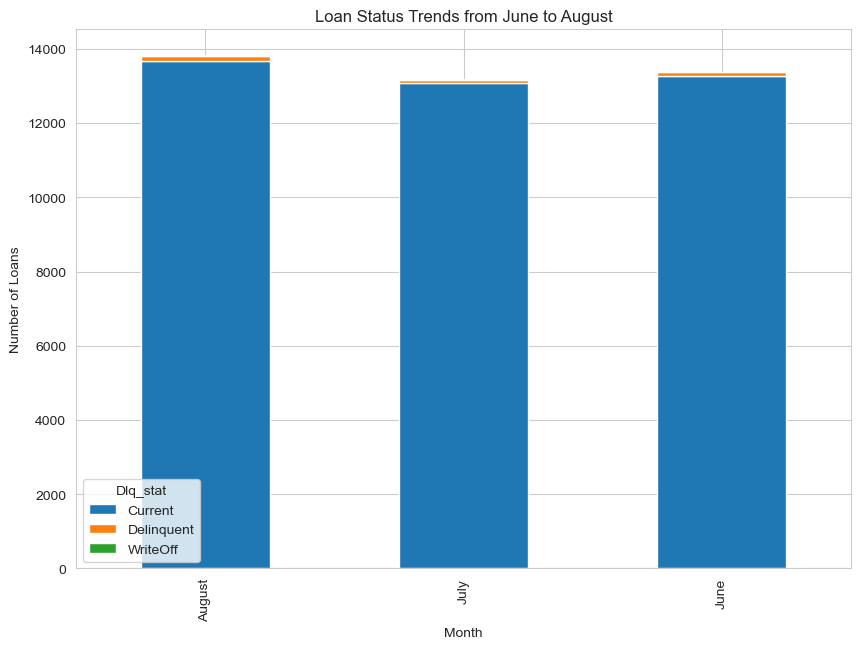

In [ ]:
loan_status_trends = df.groupby(['month', 'Dlq_stat']).size().unstack().reset_index()
loan_status_trends.set_index('month', inplace=True)

# Plotting the loan status trends
loan_status_trends.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Loan Status Trends from June to August')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.show()

The bar chart presents the loan status trends from June to August. The loan statuses are divided into "Current", "Delinquent", and "WriteOff".

From the chart, we can observe the following:

The majority of loans remain "Current" throughout the three months, which is a positive sign.
The number of "Delinquent" loans seems to have decreased slightly from June to July, and then slightly increased in August.
The number of loans written off ("WriteOff") seems to be relatively stable across the three months, with a small increase in August.
These trends provide some insights into the loan performance over these three months. However, to get a more comprehensive understanding, we should consider other factors as well, such as the total number of delinquent days, the total outstanding amounts, and the distribution across loan origination channels and provinces. Let's continue the analysis with these factors.

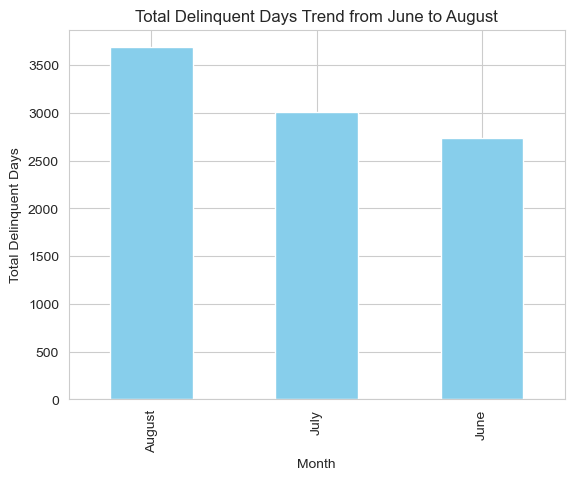

In [ ]:
# Total Delinquent Days Trend
delinquent_days_trend = df.groupby('month')['Dlq_days'].sum()

# Plotting the total Delinquent Days Trend
delinquent_days_trend.plot(kind='bar', color='skyblue')

plt.title('Total Delinquent Days Trend from June to August')
plt.xlabel('Month')
plt.ylabel('Total Delinquent Days')
plt.show()

The total number of delinquent days increased in August, surpassing the June level. This suggests that loan performance worsened in August.

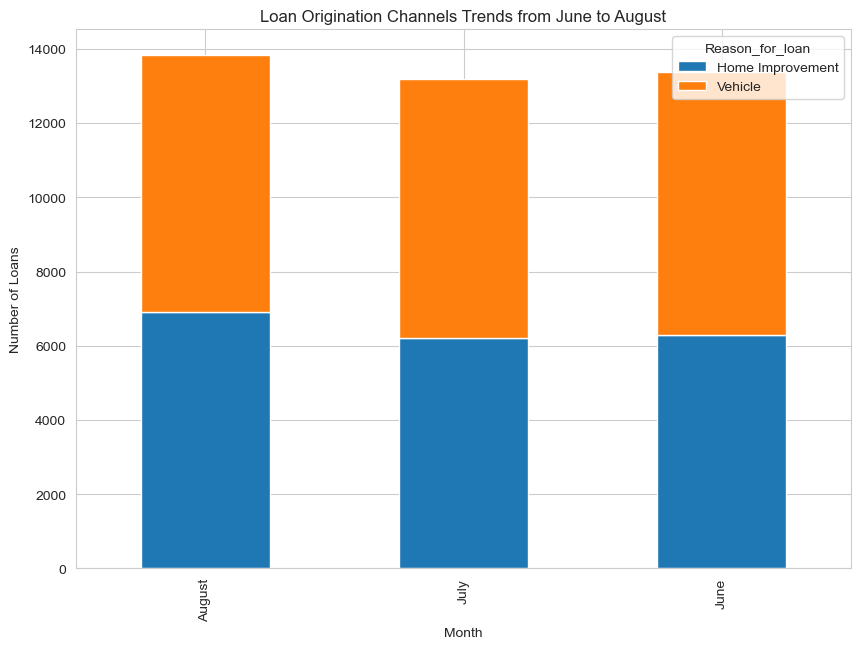

In [ ]:
# Loan Origination Channels Trends
loan_channels_trend = df.groupby(['month', 'Reason_for_loan']).size().unstack()

# Plotting the Loan Origination Channels Trends
loan_channels_trend.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Loan Origination Channels Trends from June to August')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.show()

Here we can see that Home Improvement loans increased. From June to August. Suggesting that the population is more eager to invest in homes.

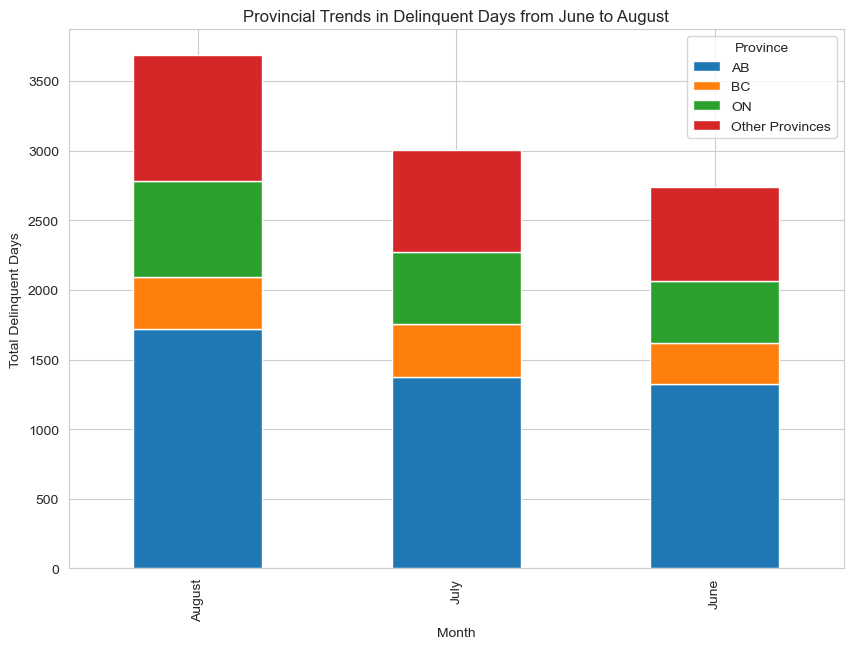

In [ ]:
# Provincial Trends in Delinquent Days
provincial_trends = df.groupby(['month', 'Province'])['Dlq_days'].sum().unstack()

# Plotting the Provincial Trends in Delinquent Days
provincial_trends.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Provincial Trends in Delinquent Days from June to August')
plt.xlabel('Month')
plt.ylabel('Total Delinquent Days')
plt.show()

Alberta still holds the most delinquent days in total. However it worsened in August, suggesting a poor performance in the Alberta Province.

Ontario also showed an increase from June to August as well.

Other provinces remained stable during july and june but had a slight increase in August.

BC increased increased from June to July but remained stable in August unlike other provinces.

# Section 2: Machine Learning Predicting Click Through Rate.

**Objective**: Given a new set of data, provide general insights and a

In [ ]:
# Click through rate data
df_ctr = pd.read_csv('/Users/emmanuelnnadi/Desktop/test2&3_data/test3_data/test3_data.csv')


In [ ]:
df_ctr.head()

,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148


In [ ]:
df_ctr.dtypes

Unnamed: 0           int64
ID                  object
ActionTime           int64
Action              object
Website             object
BannerSize          object
Brand               object
colour              object
InteractionTime    float64
dtype: object

In [ ]:
df_ctr.isna().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    8
dtype: int64

In [ ]:
df_ctr[df_ctr['InteractionTime'].isna()]

,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime
28,29,AMsySZbU2U0u2CDEQPae5UEvj7uh,1513974448167954,View,Facebook,728x90,Gap,Gold,NaN
154,155,AMsySZZNSd4doewEvAFWe9U7SEub,1503968584487308,View,Facebook,320x50,Banana Republic,Gold,NaN
812,813,AMsySZb8b-J-eW7JOEuTeIUQ5qMg,1514261353516880,Click,Kijiji,160x600,JoeFresh,other,NaN
98269,98270,AMsySZbCULOmzvMOl_jxgAPZnhmV,1512573518334683,Click,Facebook,300x250,Disney,Blue,NaN
243356,243357,AMsySZYtpCq1jCDG6_MR6U9RDbfC,1514698137892676,Click,Facebook,160x600,JoeFresh,Pink,NaN
243357,243358,AMsySZa6M_Z79mOnUWF9P8nKac5-,1516738555981098,View,Facebook,300x250,Carter's,Yellow,NaN
331970,331971,AMsySZbyqkZuERDU8VBWoJX_F4tD,1515278217655536,Click,Other,1x1,Old Navy,Pink,NaN
451827,451828,AMsySZYZjTd1kTYooOpACb0cTDL2,1515692970262672,Click,Facebook,728x90,Old Navy,Pink,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining the steps of the preprocessing pipeline
preprocessing_steps = []

# Converting binary categorical features to numerical
binary_features = ['Action']
df_ctr[binary_features] = df_ctr[binary_features].replace({'Click': 1, 'View': 0})

#Datetime conversion
df_ctr['ActionTime'] = pd.to_datetime(df_ctr['ActionTime'], unit = 'us')

#Website Rename
df_ctr['Website'] = df_ctr['Website'].str.replace('instagram.com', 'Instagram')

# Rename columns
new_col_names = {'Unnamed: 0': 'Index_num'}

df_ctr.rename(columns=new_col_names, inplace=True)

# Dropping Unwanted Columns
df_ctr.drop('Index_num', axis=1, inplace=True)

df_ctr.drop('ID', axis = 1, inplace=True)

#KNN

from sklearn.impute import KNNImputer

# Create a KNNImputer instance with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the 'InteractionTime' column using the KNNImputer
df_ctr['InteractionTime'] = imputer.fit_transform(df_ctr[['InteractionTime']])

#Feature Engineer new columnns
df_ctr['hour_of_day'] = df_ctr.ActionTime.apply(lambda x: x.hour)
df_ctr['day_of_week'] = df_ctr.ActionTime.apply(lambda val: val.day_name())
df_ctr['Month'] = df_ctr['ActionTime'].dt.month

#Numerical features
num_ft = ['InteractionTime']

preprocessing_steps.append(('standard_scaler', StandardScaler(), num_ft))

# One-hot encoding
preprocessing_steps.append(('one_hot_encoder', OneHotEncoder(), ['Website','BannerSize', 'Brand', 'colour']))

# Building the preprocessing pipeline
preprocessor = ColumnTransformer(preprocessing_steps)

# Preprocessing the data
data_preprocessed = preprocessor.fit_transform(df_ctr.drop('Action', axis=1))

# Creating a new dataframe with preprocessed data
columns_preprocessed = num_ft + list(preprocessor.named_transformers_['one_hot_encoder'].get_feature_names_out(['Website','BannerSize', 'Brand', 'colour']))

data_preprocessed = pd.DataFrame(data_preprocessed.toarray(), columns=columns_preprocessed)

# Adding the target variable back to the preprocessed dataframe
data_preprocessed['Action'] = df_ctr['Action'].values

# Displaying the preprocessed data
data_preprocessed.head()


/var/folders/wc/c_dv9b5122sdwx7sz_42kt100000gn/T/ipykernel_7453/3550998148.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ctr['Website'] = df_ctr['Website'].str.replace('instagram.com', 'Instagram')


,InteractionTime,Website_AOL,Website_Amazon,Website_Atedra,Website_Craigslist.ca,Website_Expedia,Website_Facebook,Website_Instagram,Website_Kijiji,Website_Other,...,Brand_Zara,Brand_gymboree,colour_Blue,colour_Gold,colour_Pink,colour_Red,colour_White,colour_Yellow,colour_other,Action
0,-0.828586,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,3.311351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.130802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.196381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.372202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_ctr.shape

(1000000, 10)

In [ ]:
data_preprocessed.shape

(1000000, 50)

In [ ]:
# Back Up Copy in case dataframe error due to code.
df_c1 = df_ctr.copy()

In [ ]:
object_columns = df_c1.select_dtypes(include = 'object')
num_columns = df_c1.select_dtypes(include = 'number')
print(object_columns.head())
num_columns.head()


     Website BannerSize     Brand  colour day_of_week
0   Facebook    300x600  Carter's    Pink      Monday
1   Facebook    300x250  Burberry     Red   Wednesday
2   Facebook     728x90    Disney  Yellow      Monday
3   Facebook     320x50  Carter's  Yellow     Tuesday
4  Instagram    300x250       Gap    Gold      Monday


,Action,InteractionTime,hour_of_day,Month
0,0,0.171601,12,10
1,0,4.303945,1,8
2,0,0.868106,2,12
3,0,0.802647,19,1
4,0,0.627148,2,10


## Visualization

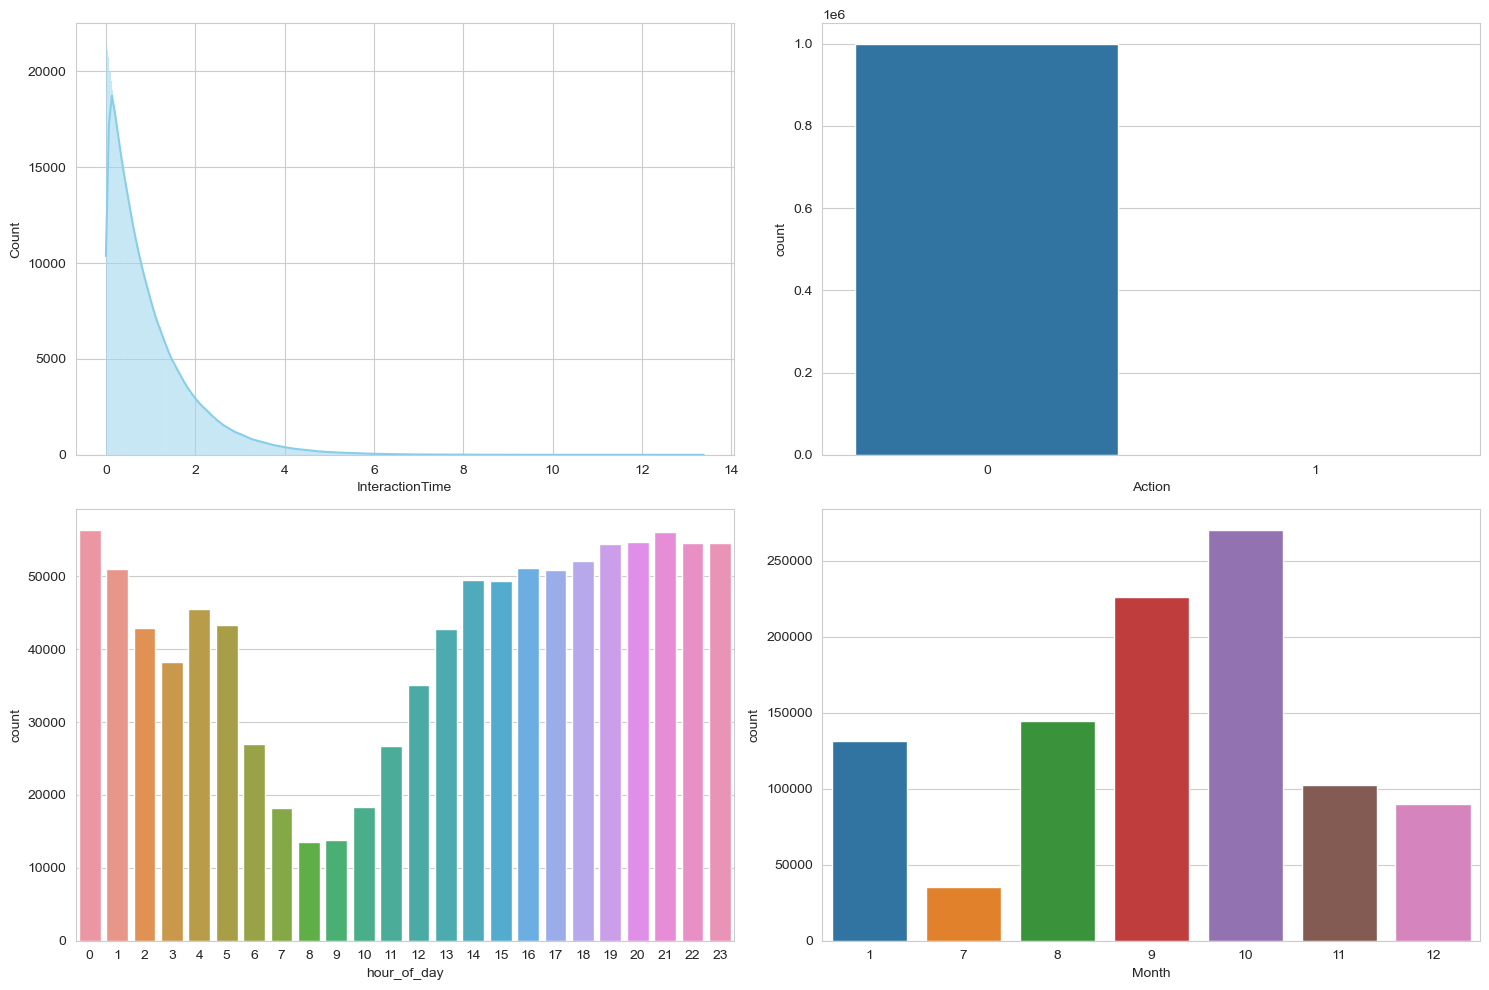

In [ ]:
# Univariate Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.histplot(data=df_ctr, x="InteractionTime", kde=True, color="skyblue", ax=axes[0, 0])
sns.countplot(data=df_ctr, x='Action', ax=axes[0, 1])
sns.countplot(data=df_ctr, x='hour_of_day', ax=axes[1, 0])
sns.countplot(data=df_ctr, x='Month', ax=axes[1, 1])

plt.tight_layout()


Majority of the Interaction Time is between 0 - 2.

Action and clicks are heavily imbalanced.

It appears the least views or activity engagement is between the 7th and the 10th hour of the day.

In [ ]:
clk = df_ctr['Action'].value_counts()
clk

0    999756
1       244
Name: Action, dtype: int64

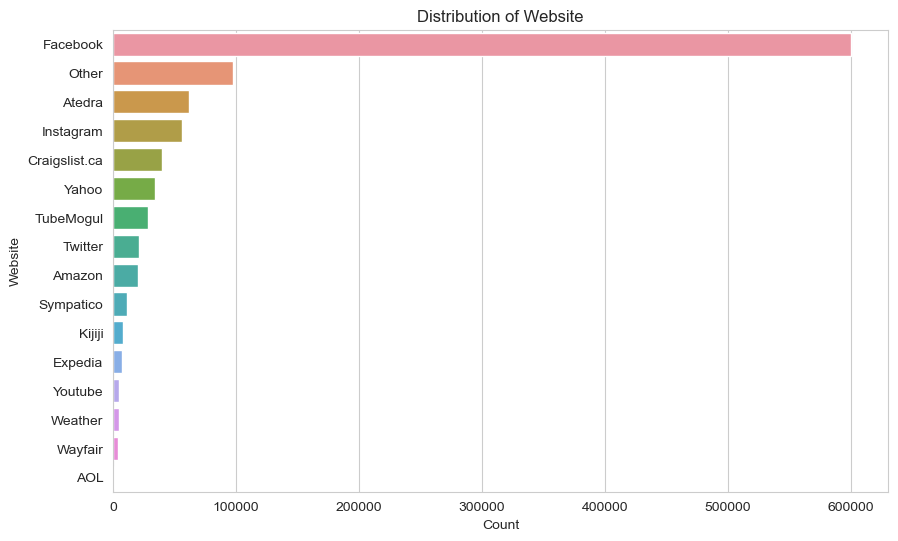

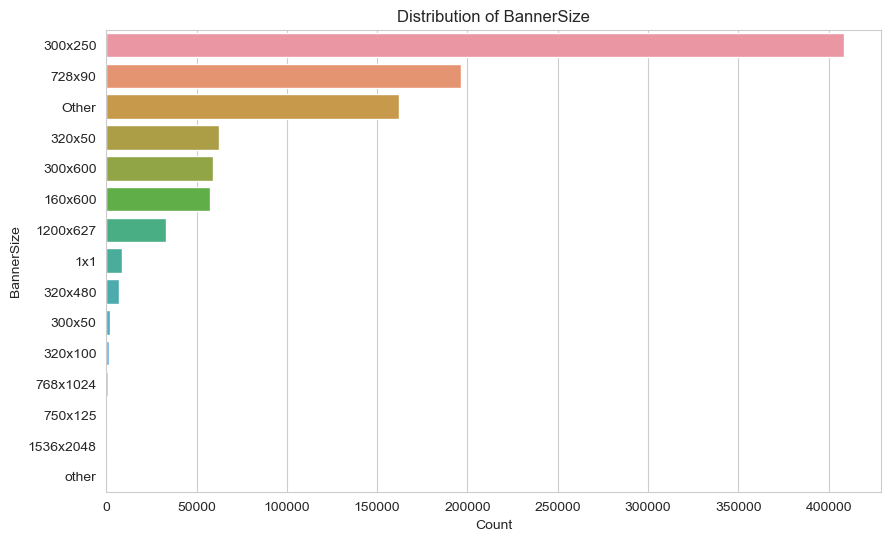

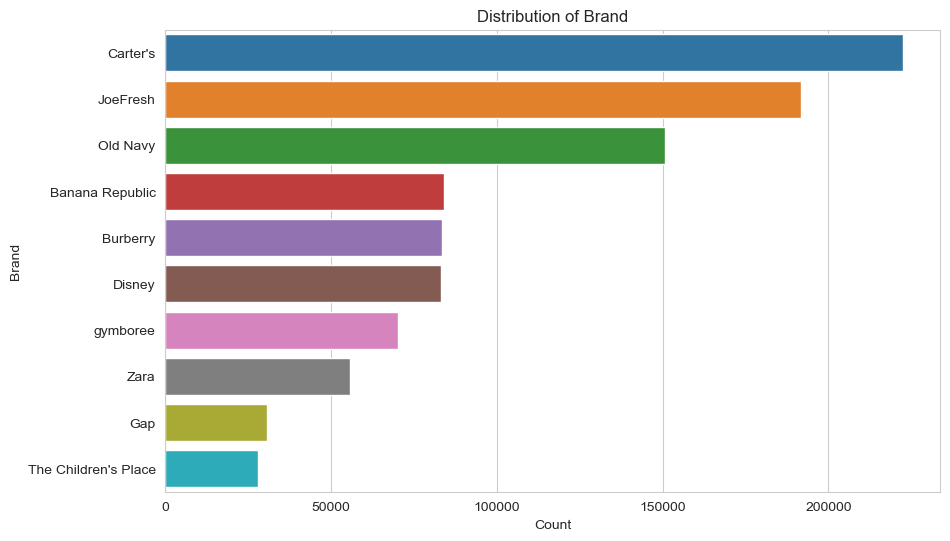

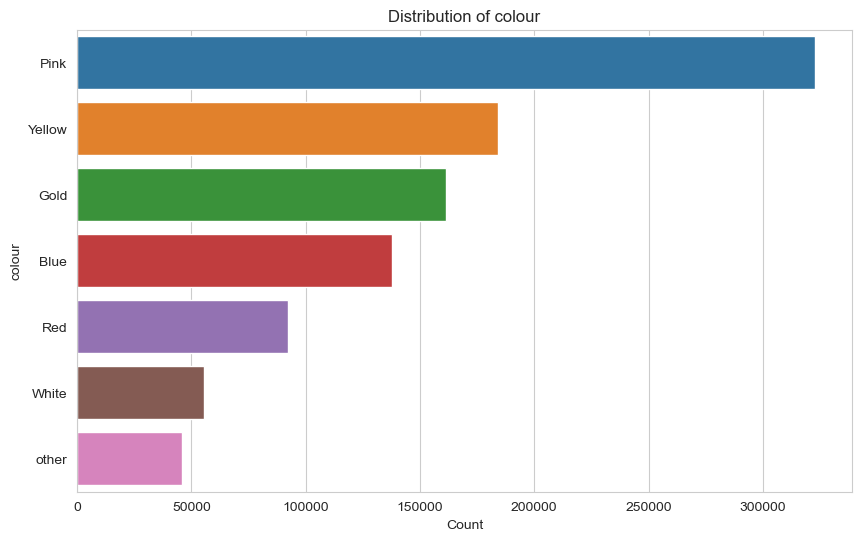

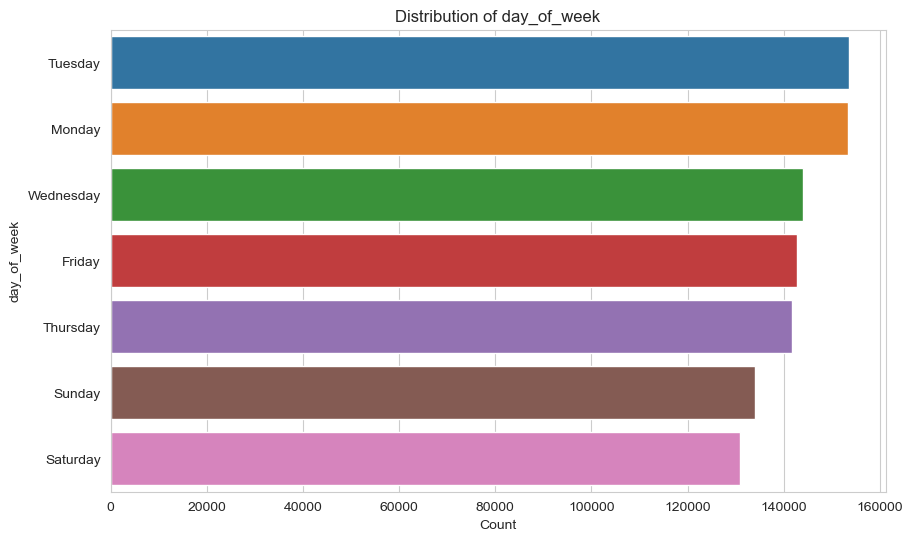

In [ ]:
for column in object_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(y=df_ctr[column], order = df_ctr[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()



# # List of categorical columns to be visualized
# # categorical_cols = ['Action', 'Website', 'BannerSize', 'Brand', 'colour']

# # Create subplots
# num_plots = len(object_columns)
# rows = 2
# cols = 2
# fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# # Plot each categorical variable in a separate subplot
# for i, column in enumerate(object_columns):
#     row = i // cols
#     col = i % cols
#     sns.countplot(y=df_c1[column], order=df_c1[column].value_counts().index, ax=axes[row, col])
#     axes[row, col].set_title(f'Distribution of {column}')
#     axes[row, col].set_xlabel('Count')
#     axes[row, col].set_ylabel(column)

# # If there are unused subplots, remove them
# if num_plots < rows * cols:
#     for i in range(num_plots, rows * cols):
#         fig.delaxes(axes.flatten()[i])

# plt.tight_layout()
# plt.show()


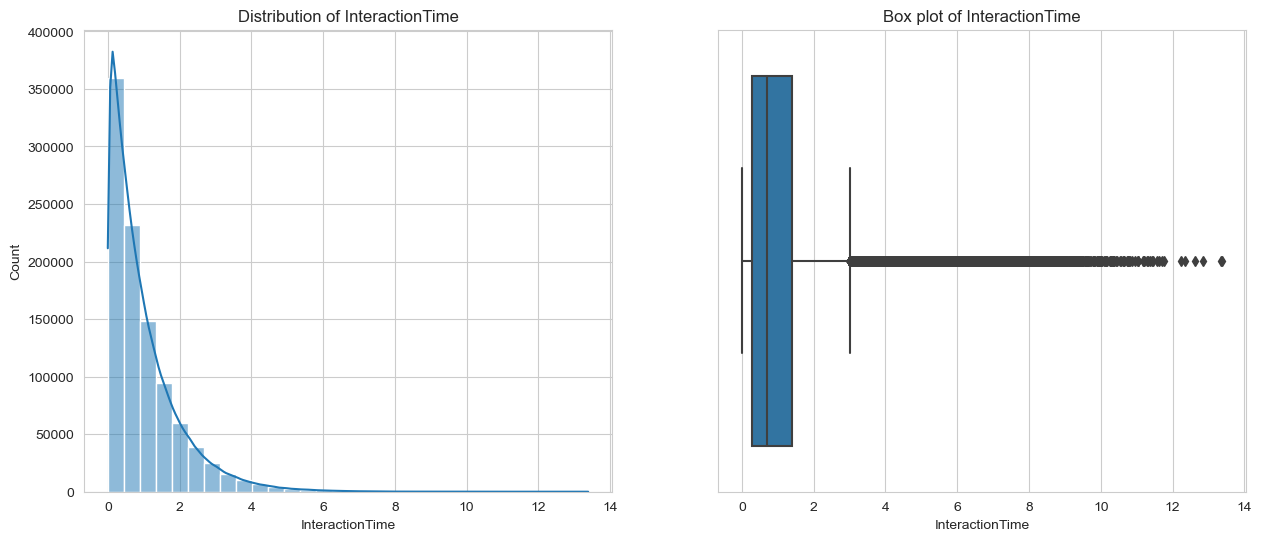

In [ ]:
# List of numerical columns to be visualized
numerical_cols = ['InteractionTime']

# Plotting each numerical variable
for column in numerical_cols:
    plt.figure(figsize=(15, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_ctr[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_ctr[column])
    plt.title(f'Box plot of {column}')

    plt.show()



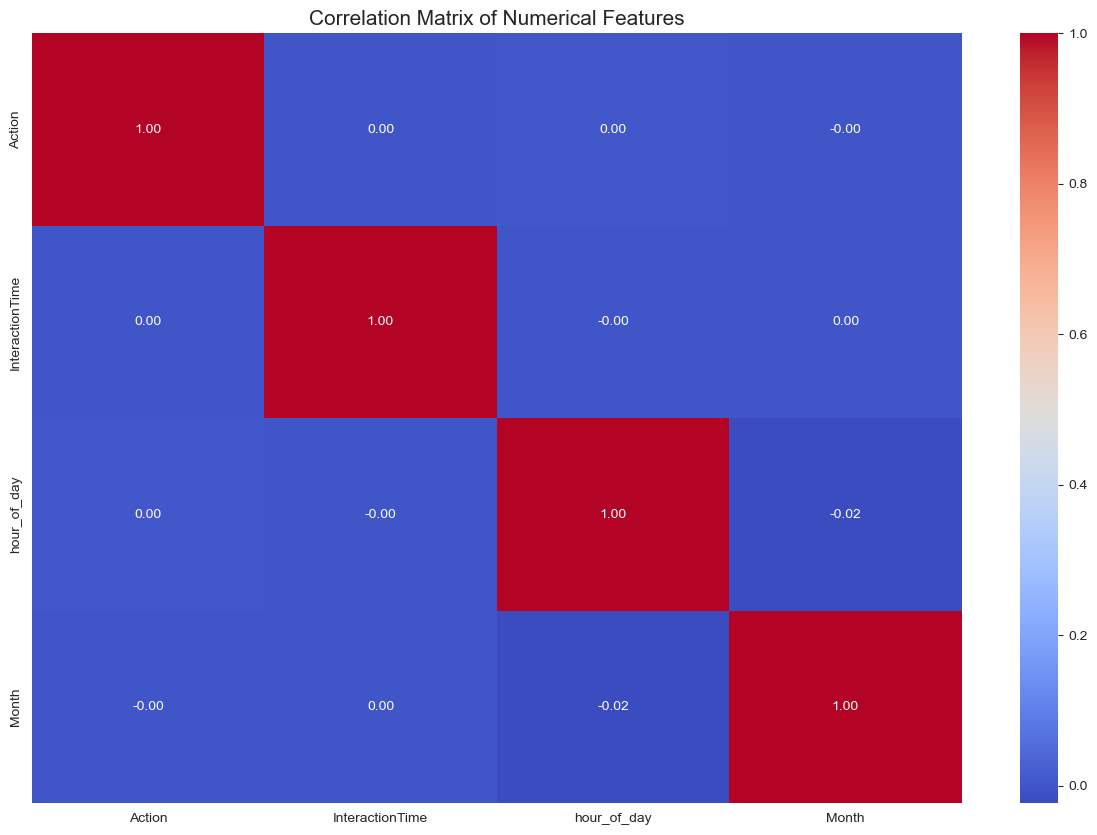

In [ ]:
corr_matrix = df_ctr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=15)
plt.show()

Not much correlation between the numerical feaetures.

In [ ]:
# categorical_col = ['Website', 'BannerSize', 'Brand','colour','day_of_week']

In [ ]:

# for feature in categorical_col:
#     plt.figure(figsize=(20,5))
#     sns.countplot(data=df_ctr, x=feature, hue='Action', palette='viridis')
#     plt.title(f"Click Rate in relation to {feature}", fontsize=15)
#     plt.show()

In [ ]:
data_preprocessed.head()

,InteractionTime,Website_AOL,Website_Amazon,Website_Atedra,Website_Craigslist.ca,Website_Expedia,Website_Facebook,Website_Instagram,Website_Kijiji,Website_Other,...,Brand_Zara,Brand_gymboree,colour_Blue,colour_Gold,colour_Pink,colour_Red,colour_White,colour_Yellow,colour_other,Action
0,-0.828586,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,3.311351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.130802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.196381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.372202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data_preprocessed.columns

Index(['InteractionTime', 'Website_AOL', 'Website_Amazon', 'Website_Atedra',
       'Website_Craigslist.ca', 'Website_Expedia', 'Website_Facebook',
       'Website_Instagram', 'Website_Kijiji', 'Website_Other',
       'Website_Sympatico', 'Website_TubeMogul', 'Website_Twitter',
       'Website_Wayfair', 'Website_Weather', 'Website_Yahoo',
       'Website_Youtube', 'BannerSize_1200x627', 'BannerSize_1536x2048',
       'BannerSize_160x600', 'BannerSize_1x1', 'BannerSize_300x250',
       'BannerSize_300x50', 'BannerSize_300x600', 'BannerSize_320x100',
       'BannerSize_320x480', 'BannerSize_320x50', 'BannerSize_728x90',
       'BannerSize_750x125', 'BannerSize_768x1024', 'BannerSize_Other',
       'BannerSize_other', 'Brand_Banana Republic', 'Brand_Burberry',
       'Brand_Carter's', 'Brand_Disney', 'Brand_Gap', 'Brand_JoeFresh',
       'Brand_Old Navy', 'Brand_The Children's Place', 'Brand_Zara',
       'Brand_gymboree', 'colour_Blue', 'colour_Gold', 'colour_Pink',
       'colour_Red', 

In [ ]:
b = data_preprocessed.drop('Action', axis = 1)

In [ ]:
b

,InteractionTime,Website_AOL,Website_Amazon,Website_Atedra,Website_Craigslist.ca,Website_Expedia,Website_Facebook,Website_Instagram,Website_Kijiji,Website_Other,...,Brand_The Children's Place,Brand_Zara,Brand_gymboree,colour_Blue,colour_Gold,colour_Pink,colour_Red,colour_White,colour_Yellow,colour_other
0,-0.828586,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.311351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.130802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.196381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.372202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.951401,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
999996,-0.941276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
999997,-0.974701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
999998,-0.545958,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Model Training

In [ ]:
df_ctr.head()

,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime,hour_of_day,day_of_week,Month
0,2017-10-23 12:30:59.495365,0,Facebook,300x600,Carter's,Pink,0.171601,12,Monday,10
1,2017-08-16 01:37:49.736117,0,Facebook,300x250,Burberry,Red,4.303945,1,Wednesday,8
2,2017-12-25 02:37:11.528120,0,Facebook,728x90,Disney,Yellow,0.868106,2,Monday,12
3,2018-01-09 19:59:12.591896,0,Facebook,320x50,Carter's,Yellow,0.802647,19,Tuesday,1
4,2017-10-09 02:06:49.374045,0,Instagram,300x250,Gap,Gold,0.627148,2,Monday,10


In [ ]:

df_ctr.to_csv('/Users/emmanuelnnadi/Desktop/ctr_data', index=False)

## Logistic Regression

In [ ]:
# col_to_train = ['Website', 'BannerSize', 'Brand','colour',
#        'InteractionTime', 'hour_of_day', 'day_of_week', 'Month']

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from tqdm import tqdm



x = data_preprocessed.drop('Action', axis = 1)
y = data_preprocessed['Action']

In [ ]:
y.value_counts()

0    999756
1       244
Name: Action, dtype: int64

In [ ]:
# # Define the random state
# random_state = 42

# # Define the cross-validation procedure with random state
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# # Define the models with random state where applicable
# models = {
#     'Logistic Regression': LogisticRegression(random_state=random_state),
#     'Random Forest': RandomForestClassifier(random_state=random_state),
#     'XGBoost': XGBClassifier(random_state=random_state),
#     'SVM': svm.SVC(random_state=random_state)
# }

# # Perform cross-validation
# for name, model in tqdm(models.items(), desc="Models"):
#     precision_list = []
#     recall_list = []
#     f1_list = []
#     accuracy_list = []

#     for train_index, test_index in cv.split(X, y):
#         X_train, X_test = x.loc[train_index], X.loc[test_index]
#         y_train, y_test = y.loc[train_index], y.loc[test_index]

#         # Perform SMOTE
#         smote = SMOTE(random_state=random_state)
#         X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#         # Train the model
#         model.fit(X_train_smote, y_train_smote)

#         # Make predictions
#         y_pred = model.predict(X_test)

#         # Calculate metrics
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)
#         accuracy = accuracy_score(y_test, y_pred)

#         precision_list.append(precision)
#         recall_list.append(recall)
#         f1_list.append(f1)
#         accuracy_list.append(accuracy)

#     print(f"\nModel: {name}")
#     print(f"Precision: {np.mean(precision_list)}")
#     print(f"Recall: {np.mean(recall_list)}")
#     print(f"F1 Score: {np.mean(f1_list)}")
#     print(f"Accuracy: {np.mean(accuracy_list)}")
#     print("------------------------")


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
x_train_sampled, y_train_sampled = oversample.fit_resample(x_train_scaled, y_train)

In [ ]:
print(pd.Series(y_train_sampled).value_counts())

0    699829
1    699829
Name: Action, dtype: int64


In [ ]:

# # model = RandomForestClassifier(n_estimators=100, random_state=42)
# #model = DecisionTreeClassifier(class_weight='balanced')
# # model = DecisionTreeClassifier(max_depth=20, random_state=42)
lr = LogisticRegression(random_state=42, max_iter = 1000)
# # model = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(x_train_sampled, y_train_sampled)

# # dt = DecisionTreeClassifier(random_state=42)

# # dt.fit(x_train_sampled, y_train_sampled)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
feature_importances_log_reg = abs(lr.coef_[0])

feature_importances_df_log_reg = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances_log_reg
})

feature_importances_df_log_reg.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances_df_log_reg)



                       Feature  Importance
4        Website_Craigslist.ca    5.875804
12             Website_Twitter    4.935400
24          BannerSize_320x100    4.793874
16             Website_Youtube    4.791977
25          BannerSize_320x480    4.430350
10           Website_Sympatico    4.420661
28          BannerSize_750x125    4.394170
8               Website_Kijiji    4.019835
11           Website_TubeMogul    3.811505
14             Website_Weather    3.690205
20              BannerSize_1x1    3.565167
18        BannerSize_1536x2048    3.408346
6             Website_Facebook    3.196238
22           BannerSize_300x50    2.965257
15               Website_Yahoo    2.947900
9                Website_Other    2.756507
13             Website_Wayfair    2.632703
31            BannerSize_other    2.308444
7            Website_Instagram    2.299223
2               Website_Amazon    2.125040
1                  Website_AOL    1.770102
5              Website_Expedia    1.740026
19         

In [ ]:
y_train_pred = lr.predict(x_train_sampled)
y_test_pred = lr.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Train score:',accuracy_score(y_train_sampled, y_train_pred))
print('Test score:',accuracy_score(y_test, y_test_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Train score: 0.6633727667758839
Test score: 0.5594566666666667
Confusion Matrix: 
 [[167796 132131]
 [    32     41]]
              precision    recall  f1-score   support

           0       1.00      0.56      0.72    299927
           1       0.00      0.56      0.00        73

    accuracy                           0.56    300000
   macro avg       0.50      0.56      0.36    300000
weighted avg       1.00      0.56      0.72    300000



## Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
oversample = SMOTE()
x_train_sampled, y_train_sampled = oversample.fit_resample(x_train_scaled, y_train)

In [ ]:
print(pd.Series(y_train_sampled).value_counts())

0    699829
1    699829
Name: Action, dtype: int64


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train_sampled, y_train_sampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
importances_dt = dt.feature_importances_

# # Create a pandas dataframe to hold features and their importances
feature_importances_dt = pd.DataFrame({"feature": x.columns, "importance": importances_dt})

# # sort the features by importance
feature_importances_dt = feature_importances_dt.sort_values("importance", ascending=False)

# # print the features and their importances
print(feature_importances_dt)

                       feature    importance
0              InteractionTime  1.287153e-01
6             Website_Facebook  9.377271e-02
34              Brand_Carter's  5.460466e-02
27           BannerSize_728x90  5.321705e-02
43                 colour_Gold  5.184397e-02
44                 colour_Pink  5.166462e-02
20              BannerSize_1x1  5.047726e-02
32       Brand_Banana Republic  4.100500e-02
33              Brand_Burberry  3.679736e-02
21          BannerSize_300x250  3.624190e-02
26           BannerSize_320x50  3.514704e-02
11           Website_TubeMogul  3.280298e-02
9                Website_Other  3.259157e-02
47               colour_Yellow  3.163977e-02
38              Brand_Old Navy  2.963900e-02
19          BannerSize_160x600  2.545834e-02
45                  colour_Red  2.525402e-02
37              Brand_JoeFresh  2.336898e-02
8               Website_Kijiji  2.070133e-02
35                Brand_Disney  1.951466e-02
41              Brand_gymboree  1.859351e-02
23        

In [ ]:
y_train_pred = dt.predict(x_train_sampled)
y_test_pred = dt.predict(x_test_scaled)

In [ ]:
print('Train score:',accuracy_score(y_train_sampled, y_train_pred))
print('Test score:',accuracy_score(y_test, y_test_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Train score: 0.9999592757659371
Test score: 0.9717966666666666
Confusion Matrix: 
 [[291536   8391]
 [    70      3]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    299927
           1       0.00      0.04      0.00        73

    accuracy                           0.97    300000
   macro avg       0.50      0.51      0.49    300000
weighted avg       1.00      0.97      0.99    300000



In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 5, 10],       # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
# }



# grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5)

# grid_search.fit(x_train_sampled, y_train_sampled)

# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# best_model = grid_search.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5)

# Fit GridSearchCV on the under-sampled training data
grid_search.fit(x_train_sampled, y_train_sampled)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Train a logistic regression model with the best parameters
log_reg_best = LogisticRegression(C=grid_search.best_params_['C'], random_state=42, max_iter=1000)
log_reg_best.fit(x_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred_best = log_reg_best.predict(x_test)

# Print a classification report
report_best = classification_report(y_test, y_pred_best)
print(report_best)


Best parameters:  {'C': 0.001}
Best cross-validation score:  0.6642529816492484


/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.19      0.32    299927
           1       0.00      0.89      0.00        73

    accuracy                           0.19    300000
   macro avg       0.50      0.54      0.16    300000
weighted avg       1.00      0.19      0.32    300000



In [ ]:
from sklearn.model_selection import cross_val_score

# instantiate the model


# perform k-fold cross-validation. The cv is set to 5 so we can test it 5 times.
scores = cross_val_score(lr, x_train_sampled, y_train_sampled, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.66299316 0.66232871 0.66265022 0.66387788 0.66188096]
Average cross-validation score:  0.6627461853298999


In this case, the model has an average accuracy of approximately 66.27% on the training data based on the cross-validation procedure.

In [ ]:
from sklearn.model_selection import cross_val_score

# instantiate the model


# perform k-fold cross-validation. The cv is set to 5 so we can test it 5 times.
scores = cross_val_score(dt, x_train_sampled, y_train_sampled, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.97131803 0.97120015 0.97210751 0.97179662 0.97156799]
Average cross-validation score:  0.9715980619326228


The Decision Tree Classifier has an average accuracy of approximately 97.16% on the training data based on the cross-validation procedure. It is a better fit for the this case however both Models produce an F1 score of zero. Suggesting that we indeed need more data to proceed.

The Click to View is still too heavily imbalanced.